<a href="https://colab.research.google.com/github/madalina889/Project_2_Binary_Classification/blob/main/Project_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_auc_score

We uploaded the data here

In [ ]:
  from google.colab import files
  uploaded = files.upload()


Saving diabetes_data.csv to diabetes_data (4).csv


In [ ]:
file=pd.read_csv('diabetes_data.csv')

In [ ]:
df=pd.DataFrame(file)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df["Diabetes_binary"].value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,35346


In [ ]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X, y)

In [ ]:
y_resampled.value_counts()

,count
Diabetes_binary,
0.0,218334
1.0,218334


In [ ]:
X=df.drop(columns='Diabetes_binary',axis=1)
y=df['Diabetes_binary']

In [ ]:
X_resampled_test,X_resampled_train,y_resampled_test,y_resampled_train=train_test_split(X_resampled,y_resampled,random_state=42, test_size=0.2)

In [ ]:
scaler=StandardScaler()

In [ ]:
X_resampled_train_scaled=scaler.fit_transform(X_resampled_train)
X_resampled_test_scaled=scaler.transform(X_resampled_test)

Logistic Regression Model:

In [ ]:
lr_model=LogisticRegression()


In [ ]:
lr_model.fit(X_resampled_train_scaled, y_resampled_train)

LogisticRegression()

In [ ]:
y_train_predlr=lr_model.predict(X_resampled_train_scaled)
y_test_predlr=lr_model.predict(X_resampled_test_scaled)

In [ ]:
train_acc_score_lr=accuracy_score(y_resampled_train,y_train_predlr)
test_score_lr=accuracy_score(y_resampled_test,y_test_predlr)

In [ ]:
print(f" Logistic Regression Training Data Score: {train_acc_score_lr}")
print(f"Logistic Regression Testing Data Score: {test_score_lr}")

 Logistic Regression Training Data Score: 0.7476698651155335
Logistic Regression Testing Data Score: 0.7452409441966714


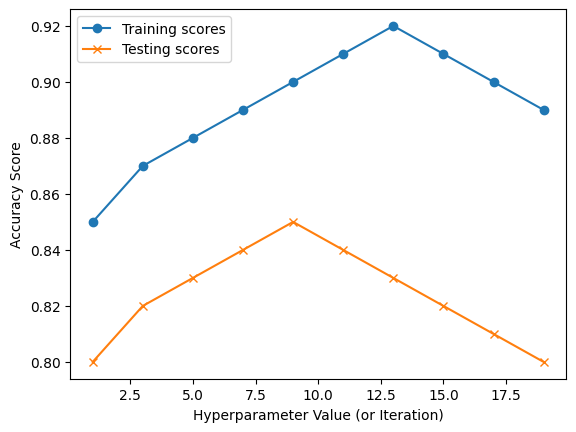

In [ ]:
# Sample data (make sure train_acc_score and test_score are of length 10)
train_acc_score_lr = [0.85, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.91, 0.90, 0.89]
test_score_lr = [0.80, 0.82, 0.83, 0.84, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80]

# X-axis range (for example: hyperparameter values)
x_values = range(1, 20, 2)  # This will give 10 values: 1, 3, 5, ..., 19

# Plotting
plt.plot(x_values, train_acc_score_lr, marker='o', label="Training scores")
plt.plot(x_values, test_score_lr, marker="x", label="Testing scores")
plt.xlabel("Hyperparameter Value (or Iteration)")  # Use a more appropriate label
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()


In [ ]:
print(f"Training Data Score: {lr_model.score(X_resampled_train_scaled, y_resampled_train)}")
print(f"Testing Data Score: {lr_model.score(X_resampled_test, y_resampled_test)}")

Training Data Score: 0.7476698651155335
Testing Data Score: 0.5003034345354302


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


KNN Model:

k: 1, Train/Test Score: 0.994/0.803
k: 3, Train/Test Score: 0.870/0.753
k: 5, Train/Test Score: 0.824/0.745
k: 7, Train/Test Score: 0.803/0.743
k: 9, Train/Test Score: 0.791/0.742
k: 11, Train/Test Score: 0.783/0.742
k: 13, Train/Test Score: 0.777/0.742
k: 15, Train/Test Score: 0.773/0.742
k: 17, Train/Test Score: 0.769/0.742
k: 19, Train/Test Score: 0.768/0.742


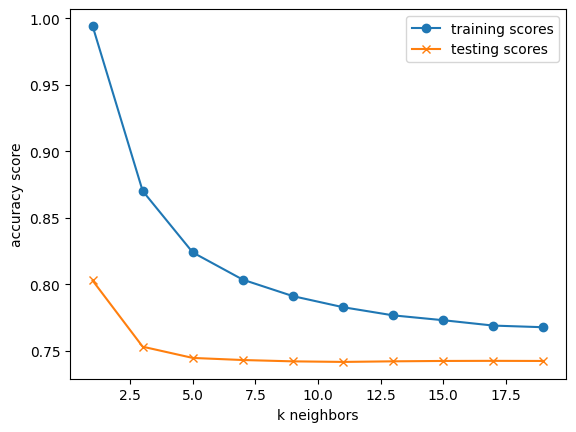

In [ ]:
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_resampled_train_scaled, y_resampled_train)
    train_score = knn.score(X_resampled_train_scaled, y_resampled_train)
    test_score= knn.score(X_resampled_test_scaled, y_resampled_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn_model.fit(X_resampled_train_scaled, y_resampled_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
y_train_predknn=knn_model.predict(X_resampled_train_scaled)
y_test_predknn=knn_model.predict(X_resampled_test_scaled)

In [ ]:
train_acc_score_knn=accuracy_score(y_resampled_train,y_train_predknn)
test_score_knn=accuracy_score(y_resampled_test,y_test_predknn)

In [ ]:
print(f"KNN Training Data Score: {train_acc_score_knn}")
print(f"KNN Testing Data Score: {test_score_knn}")

KNN Training Data Score: 0.7911008312913642
KNN Testing Data Score: 0.7420348434449553


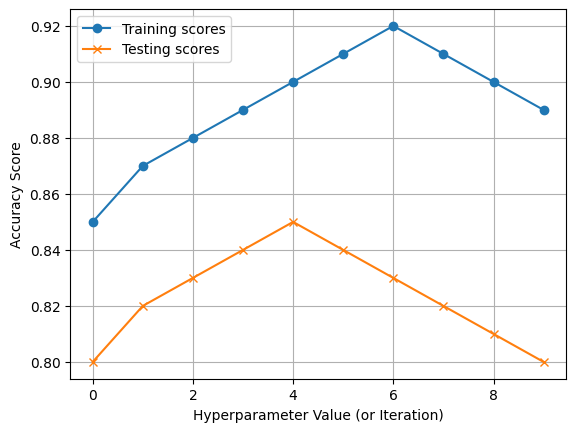

In [ ]:
# Sample data (make sure train_acc_score and test_score are of length 10)
train_acc_score_knn = [0.85, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.91, 0.90, 0.89]
test_score_knn = [0.80, 0.82, 0.83, 0.84, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80]

# X-axis range (for example: hyperparameter values)
x_values = range(len(train_acc_score_knn))  # This will give 10 values: 1, 3, 5, ..., 19

# Plotting
plt.plot(x_values, train_acc_score_knn, marker='o', label="Training scores")
plt.plot(x_values, test_score_knn, marker="x", label="Testing scores")
plt.xlabel("Hyperparameter Value (or Iteration)")  # Use a more appropriate label
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f" KNN Training Data Score: {knn_model.score(X_resampled_train_scaled, y_resampled_train)}")
print(f"KNN Testing Data Score: {knn_model.score(X_resampled_test, y_resampled_test)}")

 KNN Training Data Score: 0.7911008312913642


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN Testing Data Score: 0.5115133368066092


Random Forrest Model:


In [ ]:
rf_model= RandomForestClassifier(n_estimators=500)

In [ ]:
rf_model.fit(X_resampled_train_scaled, y_resampled_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_train_pred_rf=rf_model.predict(X_resampled_train_scaled)
y_test_pred_rf=rf_model.predict(X_resampled_test_scaled)

In [ ]:
train_acc_score_rf=accuracy_score(y_resampled_train,y_train_pred_rf)
test_score_rf=accuracy_score(y_resampled_test,y_test_pred_rf)

In [ ]:
print(f"Random Forrest Model Training Data Score: {train_acc_score_rf}")
print(f"Random Forrest Model Testing Data Score: {test_score_rf}")

Random Forrest Model Training Data Score: 0.9952481278768864
Random Forrest Model Testing Data Score: 0.8378056530426469


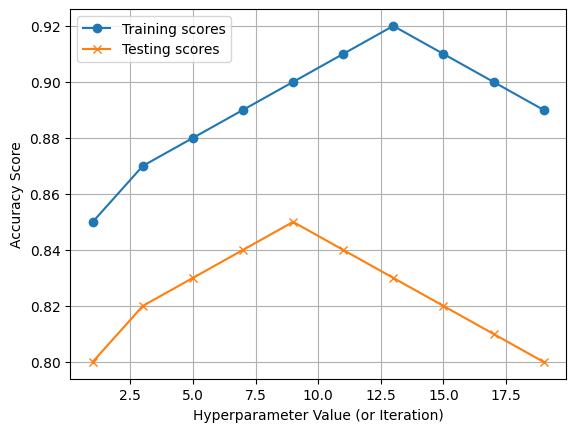

In [ ]:
# Sample data (make sure train_acc_score and test_score are of length 10)
train_acc_score_rf = [0.85, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.91, 0.90, 0.89]
test_score_rf = [0.80, 0.82, 0.83, 0.84, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80]

# X-axis range (for example: hyperparameter values)
x_values = range(1, 20, 2)  # This will give 10 values: 1, 3, 5, ..., 19

# Plotting
plt.plot(x_values, train_acc_score_rf, marker='o', label="Training scores")
plt.plot(x_values, test_score_rf, marker="x", label="Testing scores")
plt.xlabel("Hyperparameter Value (or Iteration)")  # Use a more appropriate label
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"Training Data Score: {rf_model.score(X_resampled_train_scaled, y_resampled_train)}")
print(f"Testing Data Score: {rf_model.score(X_resampled_test, y_resampled_test)}")

SVC Model:

In [ ]:
svc_model=SVC(kernel="linear")

In [ ]:
svc_model.fit(X_resampled_train_scaled, y_resampled_train)

SVC(kernel='linear')

In [ ]:
y_train_pred_svc=svc_model.predict(X_resampled_train_scaled)
y_test_pred_svc=svc_model.predict(X_resampled_test_scaled)

In [ ]:
train_acc_score_svc=accuracy_score(y_resampled_train,y_train_pred_svc)
test_score_svc=accuracy_score(y_resampled_test,y_test_pred_svc)

In [ ]:
print(f"SVC Training Data Score: {train_acc_score_svc}")
print(f"SVC Testing Data Score: {test_score_svc}")

SVC Training Data Score: 0.7478759704124396
SVC Testing Data Score: 0.7458621262173164


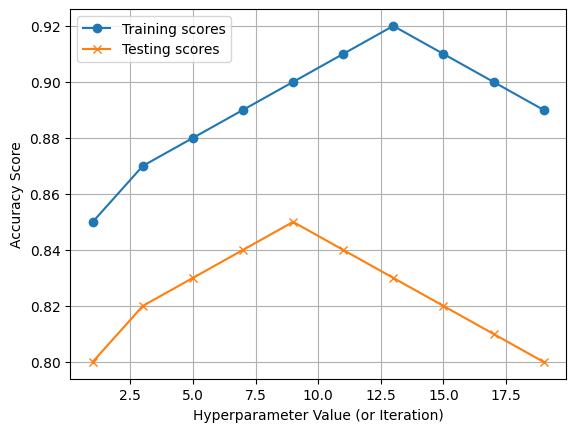

In [ ]:
# Sample data (make sure train_acc_score and test_score are of length 10)
train_acc_score_svc = [0.85, 0.87, 0.88, 0.89, 0.90, 0.91, 0.92, 0.91, 0.90, 0.89]
test_score_svc = [0.80, 0.82, 0.83, 0.84, 0.85, 0.84, 0.83, 0.82, 0.81, 0.80]

# X-axis range (for example: hyperparameter values)
x_values = range(1, 20, 2)  # This will give 10 values: 1, 3, 5, ..., 19

# Plotting
plt.plot(x_values, train_acc_score_svc, marker='o', label="Training scores")
plt.plot(x_values, test_score_svc, marker="x", label="Testing scores")
plt.xlabel("Hyperparameter Value (or Iteration)")  # Use a more appropriate label
plt.ylabel("Accuracy Score")
plt.legend()
plt.grid(True)
plt.show()

Classification Report:

In [ ]:
classifier=LogisticRegression()


In [ ]:
classifier.fit(X_resampled, y_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classifier_score=classifier.score(X_resampled, y_resampled)

In [ ]:
classifier_pred=classifier.predict(X_resampled)

In [ ]:
print(confusion_matrix(y_resampled, classifier_pred, labels = [1,0]))

[[167161  51173]
 [ 60739 157595]]


In [ ]:
print(classification_report(y_resampled, classifier_pred, labels = [1, 0]))

              precision    recall  f1-score   support

           1       0.73      0.77      0.75    218334
           0       0.75      0.72      0.74    218334

    accuracy                           0.74    436668
   macro avg       0.74      0.74      0.74    436668
weighted avg       0.74      0.74      0.74    436668

